In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt

In [2]:
df = pd.read_csv("Datasets\AusGas.csv")

In [3]:
df.head()

,Month,GasProd
0,Jan-1956,1709
1,Feb-1956,1646
2,Mar-1956,1794
3,Apr-1956,1878
4,May-1956,2173


In [24]:
y = df["GasProd"]

y_train = df["GasProd"][:464]
y_test = df["GasProd"][464:]

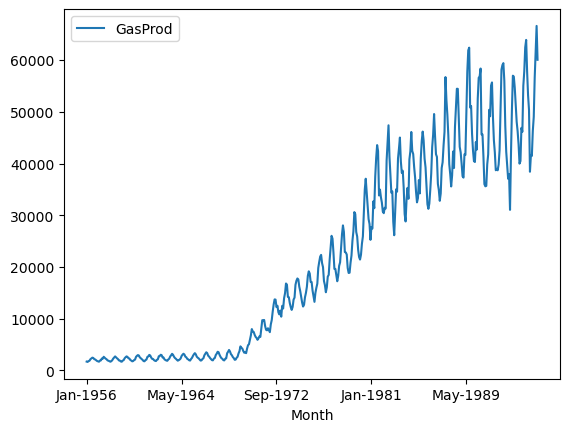

In [25]:
df.plot.line(x = "Month" , y = "GasProd")
plt.show()

In [26]:
from statsmodels.tsa.ar_model import AutoReg

## Train Autoregression

In [27]:
model = AutoReg(y_train , lags = 3 )
model_fit = model.fit()
print("coefficients %s"%model_fit.params)

coefficients const         367.207165
GasProd.L1      1.245517
GasProd.L2     -0.083027
GasProd.L3     -0.176470
dtype: float64


## Make Predictions

In [28]:
predictions = model_fit.predict(start = len(y_train),
                               end = len(y_train)+len(y_test)-1,
                               dynamic = False)

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
error  = mean_squared_error(y_test, predictions)
print("Test RMSE: %.3f" % sqrt(error))

Test RMSE: 13781.796


## Plotting

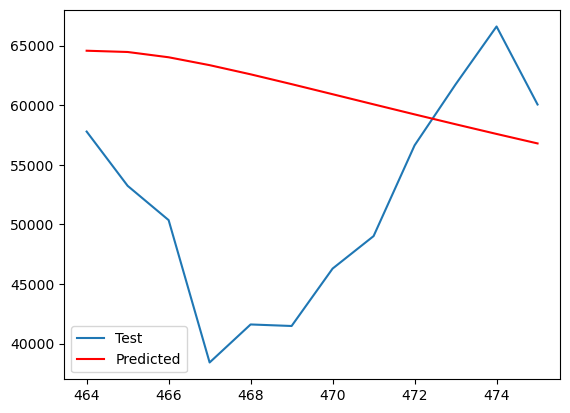

In [31]:
#plt.plot(y_train, label = "Train")
plt.plot(y_test, label = "Test")
plt.plot(predictions,color = "red", label = "Predicted")
plt.legend(loc = "best")
plt.show()

# TRAIN MA

In [33]:
from statsmodels.tsa.arima.model import ARIMA

In [34]:
model = ARIMA(y_train ,
             order = (0,0,2))
model_fit = model.fit()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


# make predictions

In [35]:
predictions = model_fit.predict(start = len(y_train),
                                end = len(y)-1,
                               #end = len(y_train)+len(y_test)-1,
                               dynamic = False)

In [36]:
error  = mean_squared_error(y_test, predictions)
print("Test RMSE: %.3f" % sqrt(error))

Test RMSE: 29464.447


# plotting

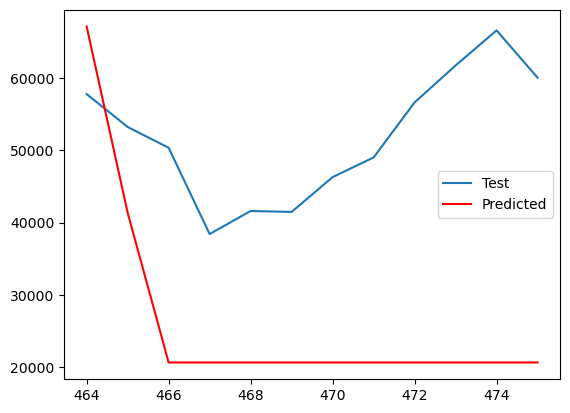

In [37]:
plt.plot(y_test, label = "Test")
plt.plot(predictions,color = "red", label = "Predicted")
plt.legend(loc = "best")
plt.show()

# Auto ARIMA 

## Installling pmdarima

! pip install pmdarima

In [40]:
from pmdarima.arima import auto_arima 

In [41]:
# autoarima is used to 
model = auto_arima(y_train,
                    trace = True,
                    error_action = "ignore",
                    suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8355.052, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8632.352, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8589.946, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8603.593, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8631.502, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.932, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8577.053, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8325.395, Time=1.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8426.135, Time=0.85 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8271.037, Time=1.24 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8404.272, Time=0.97 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=8390.964, Time=1.42 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=8

In [42]:
forecast = model.predict(n_periods = len(y_test))

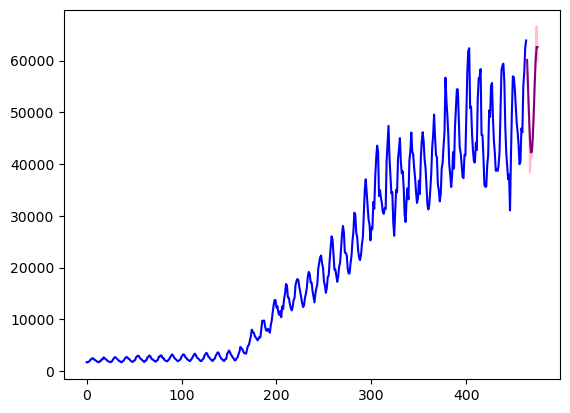

In [44]:
plt.plot(y_train,
        label = "Train",
        color = "blue")

plt.plot(y_test,
         label="Valid",
        color = "pink")

plt.plot(forecast,
        label = "Prediction",
        color = "purple")

plt.show()

## Plot Results

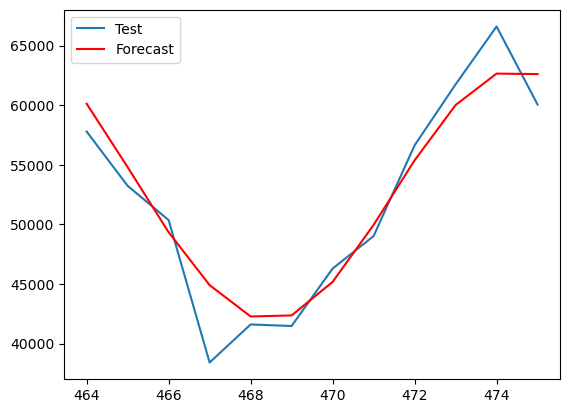

In [46]:
plt.plot(y_test,
         label = "Test")

plt.plot(forecast,
        color = "red",
        label = "Forecast")

plt.legend(loc = "best")

# SARIMA

In [49]:
model = auto_arima(y_train,
                    trace = True,
                    error_action = "ignore",
                   seasonal = True,
                   m=12,
                    suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8632.352, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8255.565, Time=0.73 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8438.509, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8631.502, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=8589.946, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.78 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=8177.113, Time=1.34 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=8438.053, Time=0.48 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=8218.666, Time=2.71 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=8230.130, Time=3.60 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=8371.138, Time=1.33 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.92 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=8219.426, Time=0.95 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

In [50]:
forecast = model.predict(n_periods = len(y_test))

## Plot Predictions for Validation set

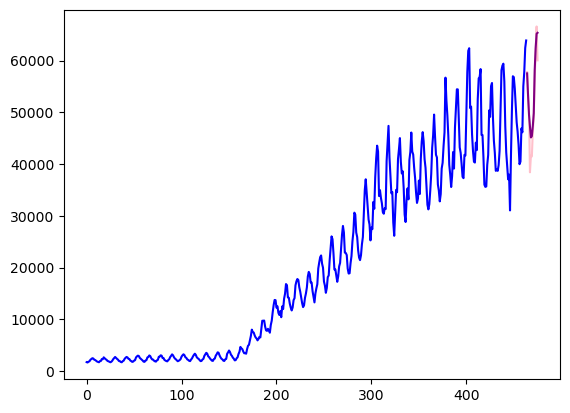

In [52]:
plt.plot(y_train,
        label = "Train",
        color = "blue")

plt.plot(y_test,
         label="Valid",
        color = "pink")

plt.plot(forecast,
        label = "Prediction",
        color = "purple")

plt.show()

## Plot Results

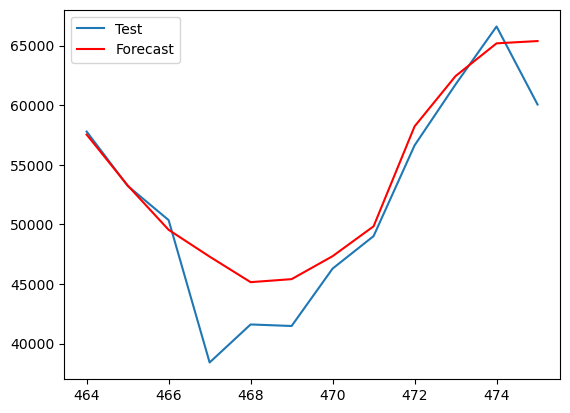

In [53]:
plt.plot(y_test,
         label = "Test")

plt.plot(forecast,
        color = "red",
        label = "Forecast")

plt.legend(loc = "best")

### Evaluation

In [56]:
rmse  = mean_squared_error(y_test, predictions)
print("Test RMSE: %.3f" % sqrt(error))

Test RMSE: 29464.447
